In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_max = 200

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()
apple = apple[:time_max]

mean = 0
std = 1
num_samples = 100
w_noise = np.random.normal(mean, std, size=num_samples)

In [3]:
# Returns an n period exponential moving average for the time series data
def ema(x, n):
    
    ema = []
    time = 1
    
    # get the average of the first n data points
    head = sum(x[:n])/n
    multiplier = 2/float(1 + n)
    ema.append(head)

    # EMA(current) = ((Price(current) - EMA(prev) ) * Multiplier) + EMA(prev)
    ema.append(((x[n] - head) * multiplier) + head)

    # calculate the rest of the values
    for price in x[n+1:]:
        tmp = ((price - ema[time]) * multiplier) + ema[time]
        time = time + 1
        ema.append(tmp)
    return ema

In [4]:
def arma_filter(thetas, phis, x):
    phis_len = len(phis)
    thetas_len = len(thetas)
    x_len = len(x)
    y = np.zeros(x_len)

    for i in range(x_len):
        tmp = 0
        # Moving Average
        for j in range(thetas_len):
            if (i-j) < 0:
                continue
            tmp += thetas[j] * x[i-j]
        # Autoregressive
        for k in range(1, phis_len):
            if (i-k) < 0:
                continue
            tmp -= phis[k] * y[i-k]
        
        tmp = tmp/phis[0]
        y[i] = tmp

    return y

In [5]:
def arma_to_ma(thetas, phis, order):
    t = len(thetas)
    p = len(phis)
    result = np.zeros(order)
    phis = [-x for x in phis]
    
    if (t < order):
        for i in range(t, order):
            thetas.append(0)
    if (p < order):
        for i in range(p, order):
            phis.append(0)
    
    result[0] = 1
    for i in range(order-1):
        result[i+1] = thetas[i+1]
        for j in range((min(i, p)+1)):
            result[i+1] = result[i+1] + result[i-j]*phis[j+1]
    return result

In [6]:
ema12_plaintext = ema(apple, 12)
arma_apple = arma_filter([0.35], [1, -0.65], apple)
ma_cof = arma_to_ma([0.35], [1, -0.65], 10)
ma_apple = arma_filter(ma_cof[1:], [1], apple)

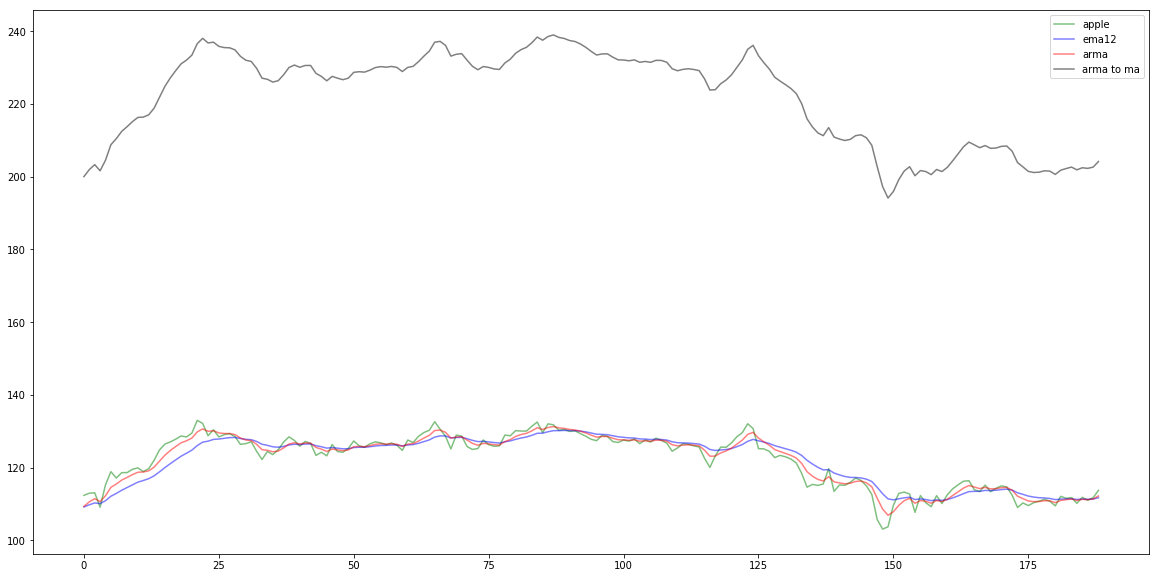

In [7]:
ema_len = len(ema12_plaintext)
apple = apple[-ema_len:]
arma_apple = arma_apple[-ema_len:]
ma_apple = ma_apple[-ema_len:]

plt.figure(figsize=(20, 10))
plt.plot(apple, color='green', alpha=0.5, label='apple')
plt.plot(ema12_plaintext, color='blue', alpha=0.5, label='ema12')
plt.plot(arma_apple, color='red', alpha=0.5, label='arma')
plt.plot(ma_apple, color='black', alpha=0.5, label='arma to ma')
plt.legend()
plt.show()

In [8]:
ema12_plaintext_noise = ema(w_noise, 12)
arma_noise = arma_filter([0.35], [1, -0.65], w_noise)
ma_cof_noise = arma_to_ma([0.35], [1, -0.65], 10)
ma_noise = arma_filter(ma_cof_noise[1:], [1], w_noise)

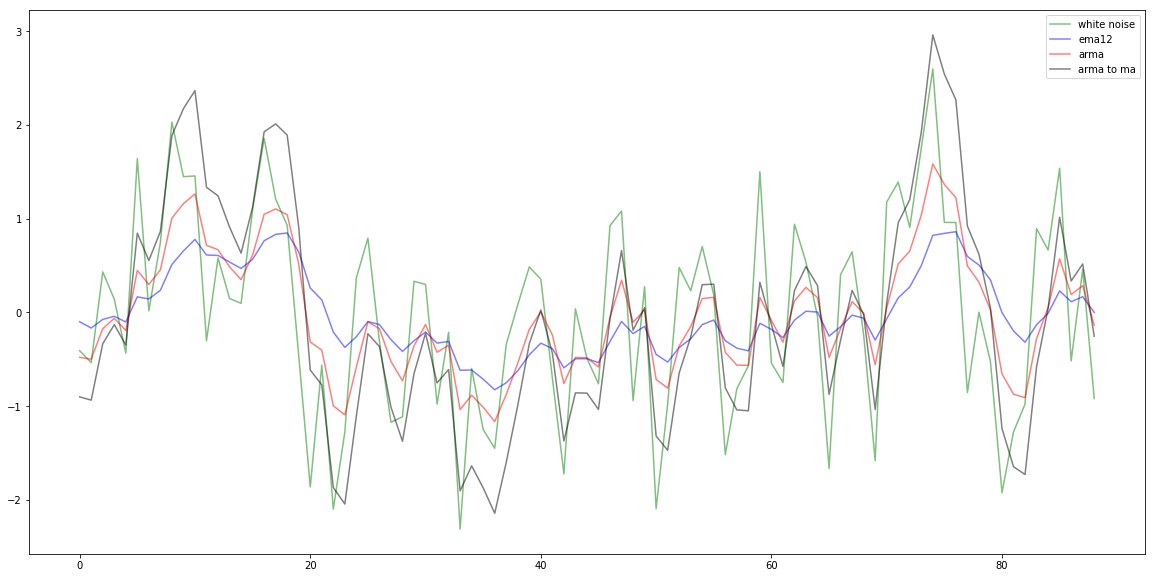

In [9]:
ema_len_noise = len(ema12_plaintext_noise)
w_noise = w_noise[-ema_len_noise:]
arma_noise = arma_noise[-ema_len_noise:]
ma_noise = ma_noise[-ema_len_noise:]

plt.figure(figsize=(20, 10))
plt.plot(w_noise, color='green', alpha=0.5, label='white noise')
plt.plot(ema12_plaintext_noise, color='blue', alpha=0.5, label='ema12')
plt.plot(arma_noise, color='red', alpha=0.5, label='arma')
plt.plot(ma_noise, color='black', alpha=0.5, label='arma to ma')
plt.legend()
plt.show()